# <font color='red'>Predictive Model</font>

## Table of Contents

[1. Basic information](#1.-Basic-infos)

[2. Libraries](#2.-Libraries)

[3. Data](#3.-Data)

* [3.1 Data preparation](#3.1-Data-preparation)

* [3.2 Split data](#3.2-Split-data)

[4. Modeling](#4.-Modeling)

* [4.1 Multicollinearity](#4.1-Multicollinearity)

* [4.2 X_test preparation](#4.2-X_test-preparation)

* [4.3 Logistic Regression](#4.3-Logistic-Regression)

* [4.4 Decision trees](#4.4-Decision-trees)

## 1. Basic information
[Return to Table of Contents](#Table-of-Contents)

**Source:** https://github.com/ifood/ifood-data-business-analyst-test

**Data** Data from the [previous](https://github.com/pathilink/ifood_data/blob/main/CRM_case.ipynb) notebook.

**Description of each column:**

| Variables | Description | Data type |  
|:---|:---|:---|
| AcceptedCmp1 | 1 if costumer accepted the offer in the 1<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp2 | 1 if costumer accepted the offer in the 2<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp3 | 1 if costumer accepted the offer in the 3<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp4 | 1 if costumer accepted the offer in the 4<sup>st</sup> campaign, 0 otherwise | Discrete |
| AcceptedCmp5 | 1 if costumer accepted the offer in the 5<sup>st</sup> campaign, 0 otherwise | Discrete |
| Response (target) | 1 if costumer accepted the offer in the last campaign, 0 otherwise | Discrete |
| Complain | 1 if costumer complained in the last 2 years | Discrete |
| DtCustomer | date of customer's enrollment with the company | Ordinal |
| Education | customer's level of education | Ordinal |
| Marital | customer's marital status | Nominal |
| Kidhome | number of small children in customer's household | Discrete |
| Teenhome | number of teenagers in customer's household | Discrete |
| Income | customer's yearly household income | Continuous |
| MntFishProducts | amount spent on fish products in the last 2 years | Discrete |
| MntMeatProducts | amount spent on meat products in the last 2 years | Discrete |
| MntFruits | amount spent on fruits in the last 2 years | Discrete |
| MntSweetProducts | amount spent on sweet products in the last 2 years | Discrete |
| MntWines | amount spent on wine in the last 2 years | Discrete |
| MntGoldProducts | amount spent on *gold* products in the last 2 years | Discrete |
| NumDealsPurchases | number of purchases made with discount | Discrete |
| NumCatalogPurchases | number of purchases made using catalog | Discrete |
| NumStorePurchases | number of purchases made directly in stores | Discrete |
| NumWebPurchases | number of purchases made through company's web site | Discrete |
| NumWebVisitsMonth | number of visits to company's web site in the last month | Discrete |
| Recency | number of days since the last purchase | Discrete |
| Year_Birth | year of birth | Discrete |
| ID | client identification | Discrete |
| Recency_cluster | cluster related to the number of days since the last purchase | Ordinal |
| TotalPurchases | sum of all columns related to purchasing | Discrete |
| Frequency_cluster | cluster related to total purchases | Ordinal |
| TotalAmount | sum of all columns related to amount | Discrete |
| Monetary_cluster | cluster related to total amount | Ordinal |
| Score | sum of all clusters points | Discrete |
| Segment | 

## 2. Libraries
[Return to Table of Contents](#Table-of-Contents)

In [1]:
import pandas as pd # dataframe
import numpy as np # list
import seaborn as sns # graph
from matplotlib import pyplot as plt # plot
from sklearn.model_selection import train_test_split # split data
import statsmodels.api as sm # VIF
from sklearn.linear_model import LogisticRegression # regression
from sklearn import tree # decision tree
from sklearn.metrics import accuracy_score # accuracy
from sklearn.metrics import confusion_matrix # confusion matrix

## 3. Data
[Return to Table of Contents](#Table-of-Contents)

In [2]:
# display all columns
pd.set_option('max_columns', None)

# upload data
df = pd.read_csv('../data/data_clusters')

# first 5 rows
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster,Score,Segment
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1,25,3,1617,3,7,gold
1,6260,1955,Master,Together,82384.0,0,0,2012-11-19,55,984,51,432,180,120,190,1,3,10,13,1,0,0,1,0,0,0,1,1,27,3,1957,3,7,gold
2,8717,1975,PhD,Married,80427.0,0,1,2012-09-12,56,1149,71,449,69,71,26,1,11,8,8,5,0,0,0,0,0,0,0,1,28,3,1835,3,7,gold
3,8932,1969,Master,Together,65176.0,0,1,2012-10-29,57,960,28,183,220,70,70,4,9,6,6,6,0,0,0,0,0,0,0,1,25,3,1531,3,7,gold
4,3428,1991,PhD,Together,68682.0,0,0,2013-10-06,56,919,0,505,99,30,45,1,4,9,10,2,0,0,0,0,0,0,0,1,24,3,1598,3,7,gold


In [3]:
# dataframe info
df.info()
print(f'\n The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2079 non-null   int64  
 1   Year_Birth           2079 non-null   int64  
 2   Education            2079 non-null   object 
 3   Marital_Status       2079 non-null   object 
 4   Income               2079 non-null   float64
 5   Kidhome              2079 non-null   int64  
 6   Teenhome             2079 non-null   int64  
 7   Dt_Customer          2079 non-null   object 
 8   Recency              2079 non-null   int64  
 9   MntWines             2079 non-null   int64  
 10  MntFruits            2079 non-null   int64  
 11  MntMeatProducts      2079 non-null   int64  
 12  MntFishProducts      2079 non-null   int64  
 13  MntSweetProducts     2079 non-null   int64  
 14  MntGoldProds         2079 non-null   int64  
 15  NumDealsPurchases    2079 non-null   i

### 3.1 Data preparation
[Return to Table of Contents](#Table-of-Contents)

In [4]:
# transform categorical data into dummies
def get_dummies(df):
    return pd.get_dummies(df)

In [5]:
# copy df
cols = ['ID','Dt_Customer','Segment']
df_ = df.drop(columns=cols).copy()

In [6]:
# create dummy
df_ = get_dummies(df_)

In [7]:
df_.shape

(2079, 42)

In [8]:
df_.sample(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster,Score,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
954,1962,59432.0,0,1,88,317,25,265,25,19,12,3,5,3,11,5,0,0,0,0,0,0,0,0,22,2,663,1,3,0,0,0,1,0,0,0,1,0,0,0,0,0
441,1970,66731.0,0,1,33,371,159,194,58,106,141,4,4,3,6,3,0,0,0,0,0,0,0,2,17,1,1029,2,5,0,0,1,0,0,0,0,0,0,0,0,1,0
1949,1954,52869.0,1,1,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,1,2,11,1,172,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0
845,1953,56129.0,0,1,65,320,48,133,39,72,48,4,6,2,10,4,0,0,0,0,0,0,0,1,22,2,660,1,4,0,0,0,1,0,0,0,0,0,0,1,0,0
193,1966,86358.0,1,1,78,957,47,494,82,47,95,4,5,3,6,8,0,0,0,0,0,0,0,0,18,2,1722,3,5,0,0,1,0,0,0,0,0,0,1,0,0,0


### 3.2 Split data
[Return to Table of Contents](#Table-of-Contents)

In [9]:
y = df_["Response"] # target response
X = df_.drop(["Response"], axis=1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18) # train: 80% test: 20%
print("Train-Test split complete!")
print("- X_train = " + str(X_train.shape))# + " | " + str(X_train.columns.tolist()))
print("- y_train = " + str(y_train.shape))
print("- X_test = " + str(X_test.shape)) #+ " | " + str(X_test.columns.tolist()))
print("- y_test = " + str(y_test.shape))

Train-Test split complete!
- X_train = (1663, 41)
- y_train = (1663,)
- X_test = (416, 41)
- y_test = (416,)


In [10]:
# target
y_train.value_counts()

0    1420
1     243
Name: Response, dtype: int64

In [11]:
train = X_train.copy()
train['Response'] = y_train
train.sample(3)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Recency_cluster,TotalPurchases,Frequency_cluster,TotalAmount,Monetary_cluster,Score,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response
1523,1953,41452.0,1,1,86,13,0,3,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,4,0,16,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
88,1972,80134.0,1,0,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,2,16,1,1690,3,6,0,0,1,0,0,0,0,0,1,0,0,0,0,1
731,1954,42607.0,0,1,30,156,29,56,30,32,47,2,3,2,7,3,0,0,0,0,0,0,2,14,1,350,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='Response', ylabel='Count'>

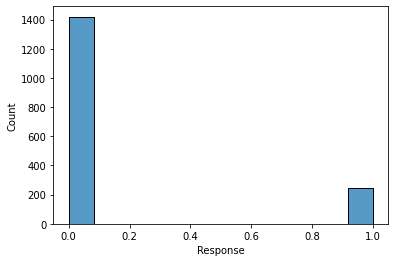

In [12]:
sns.histplot(data=train, x="Response")

## 4. Modeling
[Return to Table of Contents](#Table-of-Contents)

### 4.1 Multicollinearity
[Return to Table of Contents](#Table-of-Contents)

Variance Inflation Factor (VIF)

* If VIF = 1: no multicollinearity

* If VIF <= 5: low multicollinearity or moderately correlated

* If VIF >= 5: high multicollinearity or highly correlated

In [13]:
# column list
col_name = X_train.columns 

# VIF
for index in range(0, len(col_name)):
    model = sm.OLS(y_train, X_train)                       # fit ordinary least squares method
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print("R Square value of '{}' is {} keeping all other columns as independent features.".format(col_name[index], (round(rsq, 2))))
    print("VIF of '{}' is {}".format(col_name[index], vif))

R Square value of 'Year_Birth' is 0.33 keeping all other columns as independent features.
VIF of 'Year_Birth' is 1.5
R Square value of 'Income' is 0.33 keeping all other columns as independent features.
VIF of 'Income' is 1.5
R Square value of 'Kidhome' is 0.33 keeping all other columns as independent features.
VIF of 'Kidhome' is 1.5
R Square value of 'Teenhome' is 0.33 keeping all other columns as independent features.
VIF of 'Teenhome' is 1.5
R Square value of 'Recency' is 0.33 keeping all other columns as independent features.
VIF of 'Recency' is 1.5
R Square value of 'MntWines' is 0.33 keeping all other columns as independent features.
VIF of 'MntWines' is 1.5
R Square value of 'MntFruits' is 0.33 keeping all other columns as independent features.
VIF of 'MntFruits' is 1.5
R Square value of 'MntMeatProducts' is 0.33 keeping all other columns as independent features.
VIF of 'MntMeatProducts' is 1.5
R Square value of 'MntFishProducts' is 0.33 keeping all other columns as independent

In [14]:
# delete high correlation columns

threshold = 0.85
corr_matrix = train.corr().abs()
# corr_matrix.head()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# upper.head(10)

# select columns with correlation above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
# to_drop

# drop columns from to_drop
train_dropped = train.drop(to_drop, axis=1) 

In [15]:
print('Model variables:')
print(f'- Independent: {train_dropped.columns}')
print(f'- Dependent: {train.columns[-1]}')

Model variables:
- Independent: Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Score', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO', 'Response'],
      dtype='object')
- Dependent: Response


In [16]:
train_dropped.shape

(1663, 37)

### 4.2 X_test preparation
[Return to Table of Contents](#Table-of-Contents)

In [17]:
X_test_dropped = X_test.drop(to_drop, axis=1)
X_test_dropped.shape # not include "Response"

(416, 36)

In [18]:
# compare datasets
train_cols = train_dropped.columns
test_cols = X_test_dropped.columns

#common_cols = train_cols.intersection(pred_cols)
train_not_in_test = train_cols.difference(test_cols) # there is in 'train' and not in 'test'
train_not_in_test

Index(['Response'], dtype='object')

### 4.3 Logistic Regression
[Return to Table of Contents](#Table-of-Contents)

In [19]:
# create the model object and train
logr = LogisticRegression(max_iter=900)
logr.fit(train_dropped.iloc[:, :-1], y_train)

# predictions on the test data
predictions_logr = logr.predict(X_test_dropped)

# getting the probabilities for these predictions
predictions_probability_logr = logr.predict_proba(X_test_dropped)[:, 1]

# putting the above predictions and probabilities together to create a readable df
logr_df = pd.DataFrame(predictions_logr.reshape(len(predictions_logr),1))
logr_df.rename(columns={0:'logr_prediction'}, inplace=True)
logr_df['logr_probability'] = predictions_probability_logr
logr_df.head()

,logr_prediction,logr_probability
0,0,0.038859
1,0,0.033467
2,0,0.135839
3,0,0.012246
4,0,0.110519


In [20]:
# concatenating the predictions of logistic regression to train
df_test = y_test.reset_index(drop=True)
df_prediction = pd.concat([df_test, logr_df], axis=1)
df_prediction.sample(5)

,Response,logr_prediction,logr_probability
184,0,0,0.024648
189,0,0,0.053053
300,0,0,0.027968
36,0,0,0.100853
261,0,0,0.153005


In [21]:
# logistic regression accuracy
accuracy_score(df_prediction['Response'], df_prediction['logr_prediction'])

0.8557692307692307

In [22]:
# confusion matrix
def cmatrix(y, y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

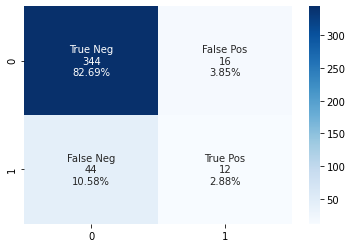

In [23]:
# logistic regression confusion matrix
cmatrix(df_prediction['Response'], df_prediction['logr_prediction']) # y, y_pred

### 4.4 Decision trees
[Return to Table of Contents](#Table-of-Contents)

In [24]:
# create the model object and train
dt = tree.DecisionTreeClassifier()
dt.fit(train_dropped.iloc[:, :-1], y_train)

# predictions on the test data
predictions_dt = dt.predict(X_test_dropped)

# getting the probabilities for these predictions
predictions_probability_dt = dt.predict_proba(X_test_dropped)[:, 1]

# putting the above two together to create a readable df
dt_df = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
dt_df.rename(columns={0:'dt_prediction'}, inplace=True)
dt_df['dt_probability'] = predictions_probability_dt
dt_df.head(5)

,dt_prediction,dt_probability
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [25]:
# concatenating the predictions of decision trees to df_train_test
df_prediction = pd.concat([df_prediction, dt_df], axis=1)
df_prediction.sample(5)

,Response,logr_prediction,logr_probability,dt_prediction,dt_probability
118,0,0,0.173362,0,0.0
52,0,0,0.083173,0,0.0
223,0,0,0.168994,0,0.0
321,0,0,0.057948,0,0.0
197,0,0,0.067694,0,0.0


In [26]:
# decision trees
accuracy_score(df_prediction['Response'], df_prediction['dt_prediction'])

0.8509615384615384

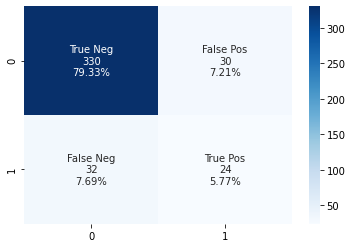

In [27]:
# decision tree confusion matrix
cmatrix(df_prediction['Response'], df_prediction['dt_prediction']) # y, y_pred

💡 The logistic regression and decision tree models showed similar results, about 85% accuracy.